### Citibike Usage Seasonal Dynamic

#### Introduction:
Citibike data shows that there is a relatively low bike useage during winter time. It is presumed that many subscribers follow a pattern in trip duration, such as grocery shopping or commuting. However, it is not clear that wether there is a seasonal dynamic in such usage pattern. In this research, we look into citibike data generated by subscribers in summer months (July and August, 2015) and winter months (January and Febuary, 2015), in order to compare the seasonal difference in trip duration generated by subscribers. 


#### Hypothesis Development:
In this research, we question if there is a significant difference between the mean of trip duration in summer months and winter months by subscribers. To test H0:  mu1 - mu2  = 0 against Ha: mu1 - mu2 not eaqual zero.

We define the null hypothesis as: There is no difference in the average trip duration of subscribers in summer months as compared to the winter months. Significance level  $\alpha=0.05$

In [13]:
from __future__ import print_function
__author__='ylai'

%pylab inline
import pandas as pd
import os
import sys
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.optimize import curve_fit, minimize
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)
import pylab as pl

#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
#make sure plots are embedded into the notebook
%pylab inline 

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib

`%matplotlib` prevents importing * from pylab and numpy

pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy


In [14]:
# Create a data frame named as 'summer' including data from July and August 2015.
jul = pd.read_csv("/Users/ericlaibuffalo/PUI2015/data/201507-citibike-tripdata.csv")
aug = pd.read_csv("/Users/ericlaibuffalo/PUI2015/data/201508-citibike-tripdata.csv")
summer = pd.concat([jul, aug], axis = 0)

jan = pd.read_csv("/Users/ericlaibuffalo/PUI2015/data/201501-citibike-tripdata.csv")
feb = pd.read_csv("/Users/ericlaibuffalo/PUI2015/data/201502-citibike-tripdata.csv")
winter = pd.concat([jan, feb], axis = 0)

In [17]:
summer_cus = summer[summer['usertype']=='Customer']
summer_cus = summer_cus.reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

In [18]:
summer_cus.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,8,1771,7/1/2015 00:01:25,7/1/2015 00:30:57,405,Washington St & Gansevoort St,40.739323,-74.008119,405,Washington St & Gansevoort St,40.739323,-74.008119,20171,Customer,NaN,0
1,10,1735,7/1/2015 00:01:50,7/1/2015 00:30:45,405,Washington St & Gansevoort St,40.739323,-74.008119,405,Washington St & Gansevoort St,40.739323,-74.008119,17543,Customer,NaN,0
2,17,951,7/1/2015 00:02:43,7/1/2015 00:18:35,212,W 16 St & The High Line,40.743349,-74.006818,498,Broadway & W 32 St,40.748549,-73.988084,16767,Customer,NaN,0
3,18,1352,7/1/2015 00:02:47,7/1/2015 00:25:20,328,Watts St & Greenwich St,40.724055,-74.009660,167,E 39 St & 3 Ave,40.748901,-73.976049,17003,Customer,NaN,0
4,21,383,7/1/2015 00:03:16,7/1/2015 00:09:39,2021,W 45 St & 8 Ave,40.759291,-73.988597,479,9 Ave & W 45 St,40.760193,-73.991255,14895,Customer,NaN,0


In [26]:
# Read json file.
import urllib2
import json

url = "https://www.citibikenyc.com/stations/json"
station = urllib2.urlopen(url)
station_list = json.load(station)
#print (df_zip)
station_list

{u'executionTime': u'2015-11-18 12:25:36 PM',
 u'stationBeanList': [{u'altitude': u'',
   u'availableBikes': 1,
   u'availableDocks': 38,
   u'city': u'',
   u'id': 72,
   u'landMark': u'',
   u'lastCommunicationTime': u'2015-11-18 12:22:44 PM',
   u'latitude': 40.76727216,
   u'location': u'',
   u'longitude': -73.99392888,
   u'postalCode': u'',
   u'stAddress1': u'W 52 St & 11 Ave',
   u'stAddress2': u'',
   u'stationName': u'W 52 St & 11 Ave',
   u'statusKey': 1,
   u'statusValue': u'In Service',
   u'testStation': False,
   u'totalDocks': 39},
  {u'altitude': u'',
   u'availableBikes': 18,
   u'availableDocks': 13,
   u'city': u'',
   u'id': 79,
   u'landMark': u'',
   u'lastCommunicationTime': u'2015-11-18 12:25:07 PM',
   u'latitude': 40.71911552,
   u'location': u'',
   u'longitude': -74.00666661,
   u'postalCode': u'',
   u'stAddress1': u'Franklin St & W Broadway',
   u'stAddress2': u'',
   u'stationName': u'Franklin St & W Broadway',
   u'statusKey': 1,
   u'statusValue': u'I

In [52]:
station = pd.read_csv('Station_List.csv')
station = station.set_index(station['id'], drop=True, append=False, inplace=False, verify_integrity=False)
station.head()

,X,Y,id,lat,lon,numbikes,racklocati,descriptio
id,,,,,,,,
14798,-73.986600,40.701485,14798,40.701485,-73.986600,27,in the parking lane of the street.,South side of York Street near Jay Street
14797,-73.986318,40.692306,14797,40.692306,-73.986318,39,in a no-parking area of the street.,West side of Lawrence Street near Willoughby S...
14796,-73.974986,40.755102,14796,40.755102,-73.974986,55,in the parking lane of the street.,South side of East 47th Street near Park Avenue
14795,-73.968341,40.708272,14795,40.708272,-73.968341,27,on the sidewalk.,East side of Kent Avenue near South 10th Stree...
14794,-74.009924,40.712786,14794,40.712786,-74.009924,47,in the parking lane of the street.,South side of Barclay Street near Church Street


In [95]:
#create a network with station id as nodes
Stations=nx.Graph()
Stations.add_nodes_from(station.index)

In [96]:
#create a dictionary of station locations
StationPos={}
for c in station.index:
   StationPos[c]=(station['lon'][c],station['lat'][c])

In [97]:
StationPos

{14435: (-74.006460000000004, 40.731597999999998),
 14436: (-73.997185000000002, 40.736553999999998),
 14437: (-73.998067000000006, 40.735349999999997),
 14438: (-74.000889000000001, 40.736338000000003),
 14439: (-74.008448999999999, 40.736213999999997),
 14440: (-74.005421999999996, 40.740701999999999),
 14441: (-74.001339000000002, 40.741709),
 14442: (-74.004462000000004, 40.746988999999999),
 14443: (-73.999972, 40.743530999999997),
 14444: (-73.999153000000007, 40.744751000000001),
 14445: (-73.986904999999993, 40.765849000000003),
 14446: (-73.988850999999997, 40.768408000000001),
 14447: (-73.982478, 40.769120000000001),
 14448: (-73.991474999999994, 40.722323000000003),
 14449: (-74.002274999999997, 40.719289000000003),
 14450: (-73.983468999999999, 40.762124999999997),
 14451: (-73.998949999999994, 40.730606999999999),
 14452: (-73.993790000000004, 40.727434000000002),
 14453: (-73.988596000000001, 40.759290999999997),
 14454: (-73.997235000000003, 40.747348000000002),
 14455:

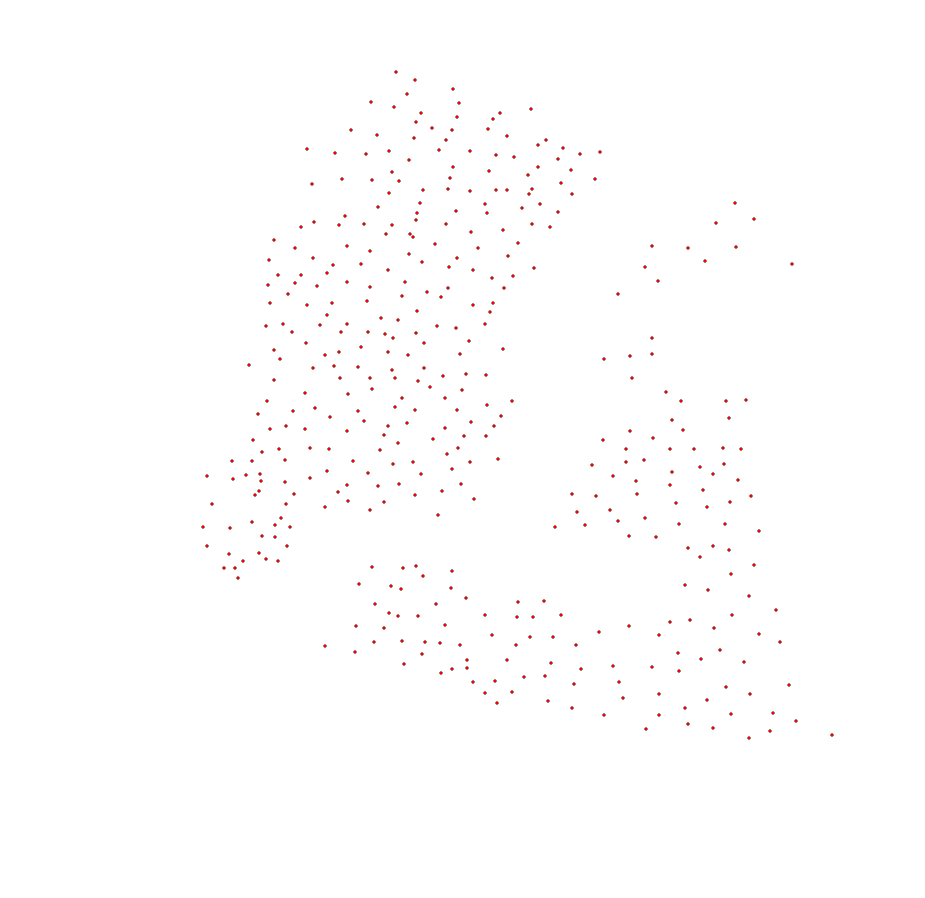

In [98]:
#visualize all the citibike stations.
plt.figure(figsize = (12,12))
nx.draw(Stations,pos=StationPos,with_labels=False,arrows=False,node_size=8)

In [99]:
#create list of edges as tuples
EN=len(summer_cus.index)
edgelist=[0]*EN
for j in range(0,EN):
    edgelist[j]=(summer_cus['start station id'][j],summer_cus['end station id'][j])
edgelist

[(405, 405),
 (405, 405),
 (212, 498),
 (328, 167),
 (2021, 479),
 (391, 504),
 (285, 534),
 (382, 212),
 (2002, 481),
 (307, 2002),
 (498, 127),
 (438, 444),
 (479, 447),
 (479, 447),
 (477, 449),
 (382, 358),
 (300, 388),
 (387, 232),
 (387, 232),
 (395, 262),
 (395, 262),
 (237, 494),
 (477, 404),
 (285, 507),
 (405, 521),
 (405, 521),
 (405, 521),
 (405, 521),
 (326, 503),
 (326, 503),
 (251, 161),
 (326, 503),
 (326, 503),
 (161, 225),
 (161, 225),
 (161, 225),
 (307, 484),
 (326, 325),
 (310, 437),
 (297, 328),
 (521, 517),
 (521, 517),
 (521, 517),
 (521, 517),
 (503, 517),
 (503, 517),
 (503, 517),
 (503, 517),
 (225, 499),
 (225, 499),
 (225, 499),
 (325, 438),
 (444, 510),
 (498, 478),
 (348, 161),
 (161, 442),
 (349, 340),
 (517, 517),
 (517, 517),
 (545, 518),
 (517, 517),
 (517, 517),
 (517, 465),
 (517, 465),
 (517, 465),
 (517, 465),
 (267, 498),
 (466, 236),
 (161, 312),
 (517, 523),
 (517, 523),
 (517, 523),
 (517, 523),
 (263, 263),
 (498, 461),
 (498, 461),
 (116, 22

In [100]:
#add edges to the network
Stations.add_edges_from(edgelist)

NetworkXError: Node 409 has no position.

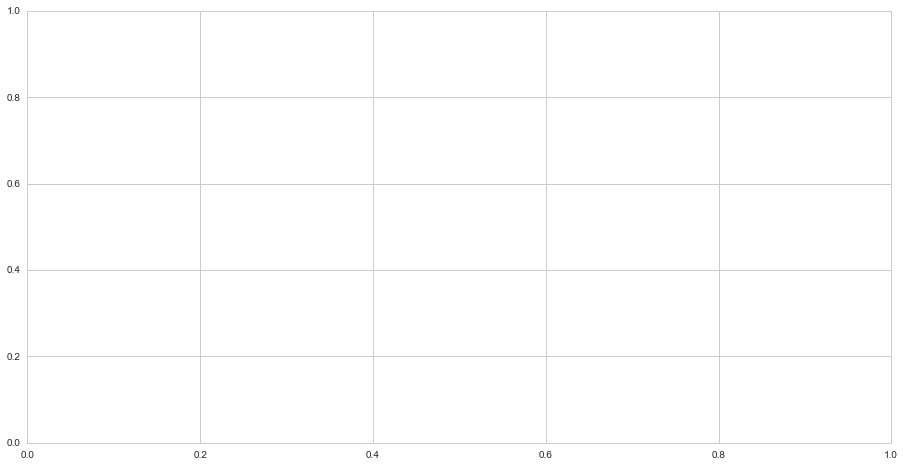

In [101]:
#visualize the network
plt.figure(figsize = (12,6))
nx.draw(Stations,pos=StationPos,with_labels=False,node_size=15,style='dotted',edge_color='green')

In [120]:
# Subset a dataframe with subscribers only.
summer_sub = summer[summer['usertype'] == 'Customer']
winter_sub = winter[winter['usertype'] == 'Customer']

In [121]:
len(summer_sub)

401358

In [122]:
summer_sub['tripduration'].describe()

count     401358.000000
mean        1840.220467
std        14463.424675
min           60.000000
25%          779.000000
50%         1223.000000
75%         1722.000000
max      5174309.000000
Name: tripduration, dtype: float64

In [123]:
#We suspect there are outliers in our observations, therefore we need to clean
summer_dur = summer_sub['tripduration']
summer_dur_clean = summer_dur[(np.abs(stats.zscore(summer_dur)) < 3)]

winter_dur = winter_sub['tripduration']
winter_dur_clean = winter_dur[(np.abs(stats.zscore(winter_dur)) < 3)]

In [124]:
fig=pl.figure(figsize(15,15))
# Create trip duration bins, in this case we use 180 seconds (3 mins) as interval for the bins.
bins = np.arange(60, 4000, 180)
# Aggregates of trip duration:
ag_summer = summer_dur_clean.groupby(pd.cut(summer_dur_clean, bins)).agg([count_nonzero])
ag_winter = winter_dur_clean.groupby(pd.cut(winter_dur_clean, bins)).agg([count_nonzero])

In [125]:
ag_winter.columns = ['Winter Trip Duration']
ag_summer.columns = ['Summer Trip Duration']

In [126]:
# Then we would like to know the percentage of trips by trip duration in these two distributions:
per_sum = (ag_summer/len(summer_dur_clean))*100
per_win = (ag_winter/len(winter_dur_clean))*100

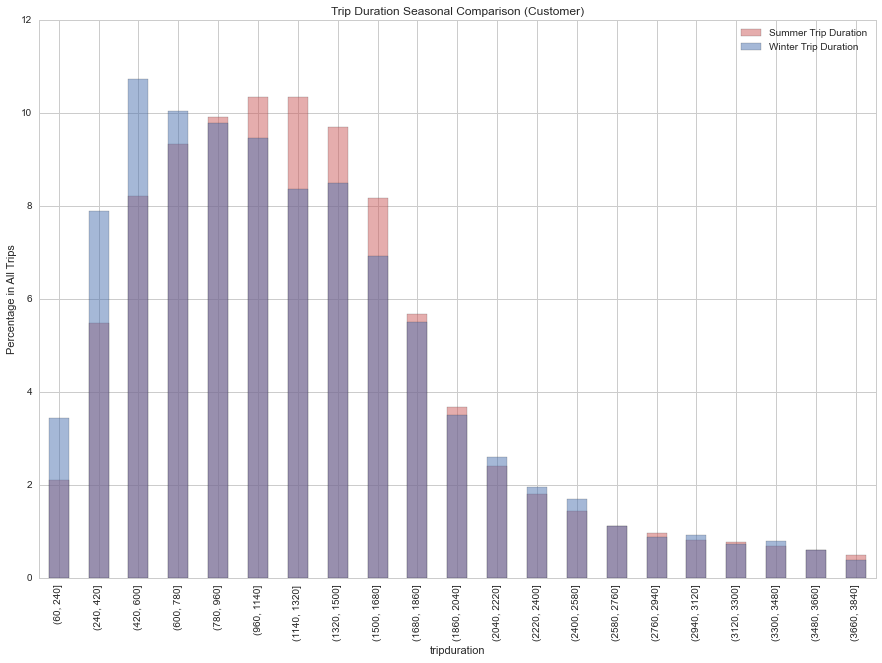

In [134]:
# Plot two trip duration distributions to compare the seasonal dynamic in trip duration.
fig = plt.figure(figsize(15,10))
ax = plt.subplot(111)
plt.ylabel('Percentage in All Trips')
plt.xlabel('Trip Duration in Second')


per_sum.plot(kind="bar", color = "IndianRed", alpha = 0.5, ax=ax, title = "Trip Duration Seasonal Comparison (Customer)", label = "Summer Trip Duration")
ax = per_win.plot(kind="bar", alpha = 0.5, ax=ax)
